# Linear Algebra in NumPy

### *Copyright 2021-2022 Dr. George Papagiannakis,  papagian@csd.uoc.gr*
*All Rights Reserved*
### *University of Crete & Foundation for Research & Technology - Hellas (FORTH)*

This notebook is also based on parts of [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) by [J.R. Johansson](http://jrjohansson.github.io). 

---

In [1]:
import matplotlib.pyplot as plt
from numpy import *

## Linear algebra

** Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.**

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [2]:
v1 = arange(0, 5)

In [3]:
v1 * 2

array([0, 2, 4, 6, 8])

In [4]:
v1 + 2

array([2, 3, 4, 5, 6])

In [5]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]), array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [6]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [7]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [8]:
A.shape, v1.shape

((5, 5), (5,))

In [9]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

**What about matrix mutiplication?** There are *two ways*. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [10]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [11]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [12]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [13]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [14]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [15]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [16]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [17]:
# inner product
v.T * v

matrix([[30]])

In [18]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [19]:
v = matrix([1,2,3,4,5,6]).T

In [20]:
shape(M), shape(v)

((5, 5), (6, 1))

In [21]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [22]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [23]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [24]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [25]:
real(C) # same as: C.real

matrix([[0., 0.],
        [0., 0.]])

In [26]:
imag(C) # same as: C.imag

matrix([[1., 2.],
        [3., 4.]])

Or the complex argument and absolute value

In [27]:
angle(C+1) # heads up MATLAB Users, angle is used instead of arg

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [28]:
abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Matrix computations

#### Inverse

In [29]:
linalg.inv(C) # equivalent to C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [30]:
C.I * C

matrix([[1.0000000e+00+0.j, 4.4408921e-16+0.j],
        [0.0000000e+00+0.j, 1.0000000e+00+0.j]])

#### Determinant

In [31]:
linalg.det(C)

(2.0000000000000004+0j)

In [32]:
linalg.det(C.I)

(0.5000000000000001+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [33]:
data = genfromtxt('data/stockholm_td_adj.dat')

# reminder, the temperature dataset is stored in the data variable:
shape(data)

(77431, 7)

#### mean

In [34]:
# the temperature data is in column 3
mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [35]:
std(data[:,3]), var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min and max

In [36]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [37]:
# highest daily average temperature
data[:,3].max()

28.3

#### sum, prod, and trace

In [38]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
# sum up all elements
sum(d)

45

In [40]:
# product of all elements
prod(d+1)

3628800

In [41]:
# cummulative sum
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [42]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [43]:
# same as: diag(A).sum()
trace(A)

110

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [44]:
with open('data/stockholm_td_adj.dat') as f:
    print("\n".join(f.read().splitlines()[:3]))

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [45]:
unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [46]:
mask_feb = data[:,1] == 2

In [47]:
# the temperature data is in column 3
mean(data[mask_feb,3])

-3.212109570736596

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

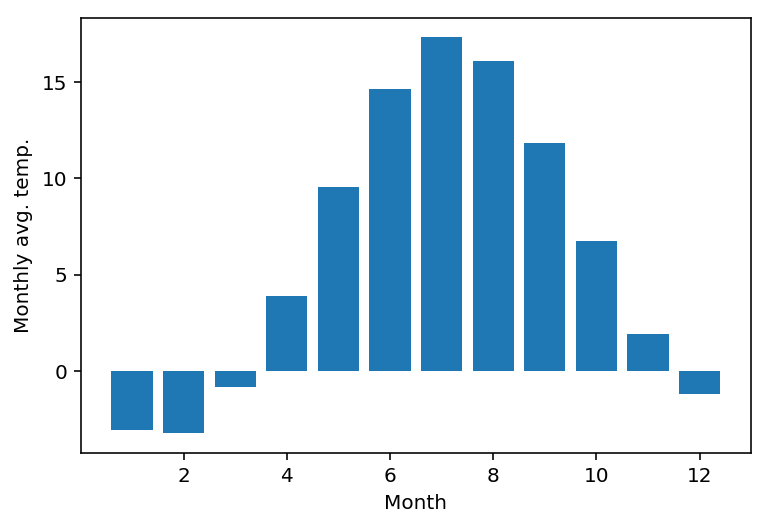

In [48]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [49]:
m = random.rand(3,3)
m

array([[0.26326052, 0.19509576, 0.44336568],
       [0.41348615, 0.45605944, 0.82319814],
       [0.50883307, 0.43800824, 0.38998934]])

In [50]:
# global max
m.max()

0.8231981410331153

In [51]:
# max in each column
m.max(axis=0)

array([0.50883307, 0.45605944, 0.82319814])

In [52]:
# max in each row
m.max(axis=1)

array([0.44336568, 0.82319814, 0.50883307])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Further reading

* Check out more introductory notebooks in **Juno**!
* [General questions about NumPy](https://www.scipy.org/scipylib/faq.html#id1)
* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

## Versions

In [53]:
%reload_ext version_information

%version_information numpy

Software versions
Python 3.6.6+ 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 7.3.0
OS Darwin 18.5.0 x86_64 64bit
numpy 1.16.1
Thu Apr 25 16:18:13 2019 +03